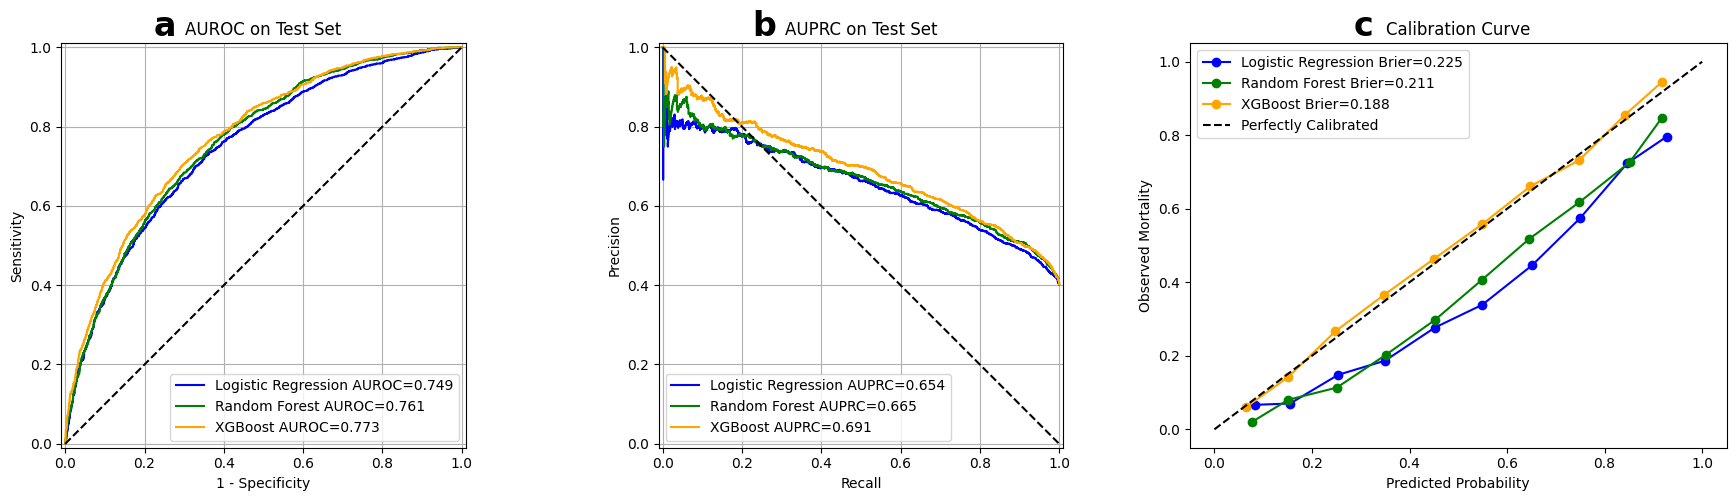

In [51]:
from sklearn.metrics import brier_score_loss

# Load predictions and true labels for each model
logistic_train = pd.read_csv('/root/DATA/train_results_logistic.csv')
logistic_test = pd.read_csv('/root/DATA/test_results_logistic.csv')

rf_train = pd.read_csv('/root/DATA/train_results_random_forest.csv')
rf_test = pd.read_csv('/root/DATA/test_results_random_forest.csv')

xgb_train = pd.read_csv('/root/DATA/train_results_xgboost.csv')
xgb_test = pd.read_csv('/root/DATA/test_results_xgboost.csv')

# Define model names and color scheme
models = {
    "Logistic Regression": {"train": logistic_train, "test": logistic_test, "color": "blue"},
    "Random Forest": {"train": rf_train, "test": rf_test, "color": "green"},
    "XGBoost": {"train": xgb_train, "test": xgb_test, "color": "orange"}
}

# Initialize plots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Set large bold labels 'a', 'b', 'c' above each subplot title
fig.text(0.124, 0.94, "a", fontsize=24, fontweight='bold', ha='center')
fig.text(0.457, 0.94, "b", fontsize=24, fontweight='bold', ha='center')
fig.text(0.79, 0.94, "c", fontsize=24, fontweight='bold', ha='center')

# ROC Curve with grid and diagonal
for model_name, data in models.items():
    fpr, tpr, _ = roc_curve(data["test"]["True_Label"], data["test"]["Predicted_Probability"])
    roc_auc = auc(fpr, tpr)
    RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax=axs[0], name=f"{model_name} AUROC={roc_auc:.3f}", color=data["color"])
axs[0].plot([0, 1], [0, 1], 'k--')  # Diagonal line
axs[0].grid(True)  # Add grid
axs[0].set_title("AUROC on Test Set")
axs[0].set_xlabel("1 - Specificity")
axs[0].set_ylabel("Sensitivity")
axs[0].legend(loc="lower right")

# PR Curve with grid, diagonal, and AUC in legend
for model_name, data in models.items():
    precision, recall, _ = precision_recall_curve(data["test"]["True_Label"], data["test"]["Predicted_Probability"])
    pr_auc = auc(recall, precision)
    PrecisionRecallDisplay(precision=precision, recall=recall).plot(ax=axs[1], name=f"{model_name} AUPRC={pr_auc:.3f}", color=data["color"])
axs[1].plot([0, 1], [1, 0], 'k--')  # Diagonal line
axs[1].grid(True)  # Add grid
axs[1].set_title("AUPRC on Test Set")
axs[1].set_xlabel("Recall")
axs[1].set_ylabel("Precision")
axs[1].legend(loc="lower left")

# Calibration Curve with Brier Score in legend
for model_name, data in models.items():
    prob_true, prob_pred = calibration_curve(data["test"]["True_Label"], data["test"]["Predicted_Probability"], n_bins=10)
    brier_score = brier_score_loss(data["test"]["True_Label"], data["test"]["Predicted_Probability"])
    axs[2].plot(prob_pred, prob_true, marker='o', label=f"{model_name} Brier={brier_score:.3f}", color=data["color"])
axs[2].plot([0, 1], [0, 1], "k--", label="Perfectly Calibrated")
axs[2].set_title("Calibration Curve")
axs[2].set_xlabel("Predicted Probability")
axs[2].set_ylabel("Observed Mortality")
axs[2].legend(loc="upper left")

# Adjust layout and display
plt.tight_layout()
plt.show()
